In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures

In [8]:
df = pd.read_csv('house_rent_data_models.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,type_location,code_departement,code_commune,prix_location,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,taxe_loyer,cuisine_equipee,...,chauffage,vitrage,parking,baignoire,balcon,jardin,meublé,colocation,approximite_metro,terrasse
0,0,75,75056,1124,2,1,31,0,1025,0,...,0,1,1,1,0,0,1,0,1,0
1,0,95,95074,520,1,1,22,0,500,0,...,1,0,0,0,0,0,0,0,0,1
2,0,93,93051,910,2,1,38,0,-1,1,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,1224,2,1,29,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,92,92026,2880,4,3,105,0,2880,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0,91,91235,1000,3,2,62,0,1840,1,...,0,0,1,0,0,0,0,0,0,0
245,0,94,94022,780,2,1,40,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
246,0,93,93006,1200,2,1,50,0,1680,0,...,0,1,0,0,0,0,1,0,0,0
247,0,95,95074,500,1,1,13,0,1680,1,...,0,0,0,0,0,1,0,0,0,0


In [9]:
df.shape

(249, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   type_location      249 non-null    int64
 1   code_departement   249 non-null    int64
 2   code_commune       249 non-null    int64
 3   prix_location      249 non-null    int64
 4   nb_pieces          249 non-null    int64
 5   nb_chambres        249 non-null    int64
 6   sbien_m²           249 non-null    int64
 7   sterrain_m²        249 non-null    int64
 8   taxe_loyer         249 non-null    int64
 9   cuisine_equipee    249 non-null    int64
 10  machine_laver      249 non-null    int64
 11  m_lave_vaisselle   249 non-null    int64
 12  bien_neuf          249 non-null    int64
 13  place_parking      249 non-null    int64
 14  ascenseur          249 non-null    int64
 15  cave               249 non-null    int64
 16  chauffage          249 non-null    int64
 17  vitrage         

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
type_location,249.0,0.056225,0.230819,0.0,0.0,0.0,0.0,1.0
code_departement,249.0,86.365462,8.248104,75.0,77.0,92.0,93.0,95.0
code_commune,249.0,86472.702811,8212.176252,75056.0,77089.0,92012.0,93048.0,95428.0
prix_location,249.0,1222.325301,641.842291,450.0,750.0,1050.0,1450.0,4115.0
nb_pieces,249.0,2.261044,1.322925,1.0,1.0,2.0,3.0,9.0
nb_chambres,249.0,1.208835,0.998266,0.0,1.0,1.0,2.0,6.0
sbien_m²,249.0,46.682731,29.409644,0.0,25.0,39.0,65.0,180.0
sterrain_m²,249.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
taxe_loyer,249.0,3790.951807,37985.364270,-1.0,-1.0,1.0,960.0,580100.0
cuisine_equipee,249.0,0.289157,0.454284,0.0,0.0,0.0,1.0,1.0


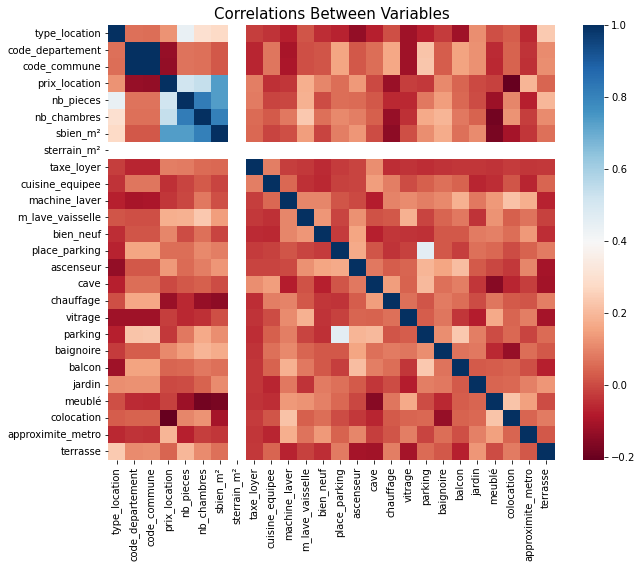

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [14]:
dt=df[['prix_location','nb_pieces', 'nb_chambres', 'sbien_m²', 'sterrain_m²', 'taxe_loyer']]

In [15]:
important_num_cols = list(dt.corr()["prix_location"][(dt.corr()["prix_location"]>0.3) | (dt.corr()["prix_location"]<-0.30)].index)
cat_cols = ['type_location','code_commune','cuisine_equipee', 'machine_laver', 'm_lave_vaisselle', 'bien_neuf','place_parking', 'ascenseur', 'cave', 'chauffage', 'vitrage', 'parking','baignoire', 'balcon', 'jardin', 'meublé', 'colocation','approximite_metro', 'terrasse']
important_cols = important_num_cols + cat_cols

data = df[important_cols]

In [16]:
data.isnull().sum()

prix_location        0
nb_pieces            0
nb_chambres          0
sbien_m²             0
type_location        0
code_commune         0
cuisine_equipee      0
machine_laver        0
m_lave_vaisselle     0
bien_neuf            0
place_parking        0
ascenseur            0
cave                 0
chauffage            0
vitrage              0
parking              0
baignoire            0
balcon               0
jardin               0
meublé               0
colocation           0
approximite_metro    0
terrasse             0
dtype: int64

In [ ]:
data


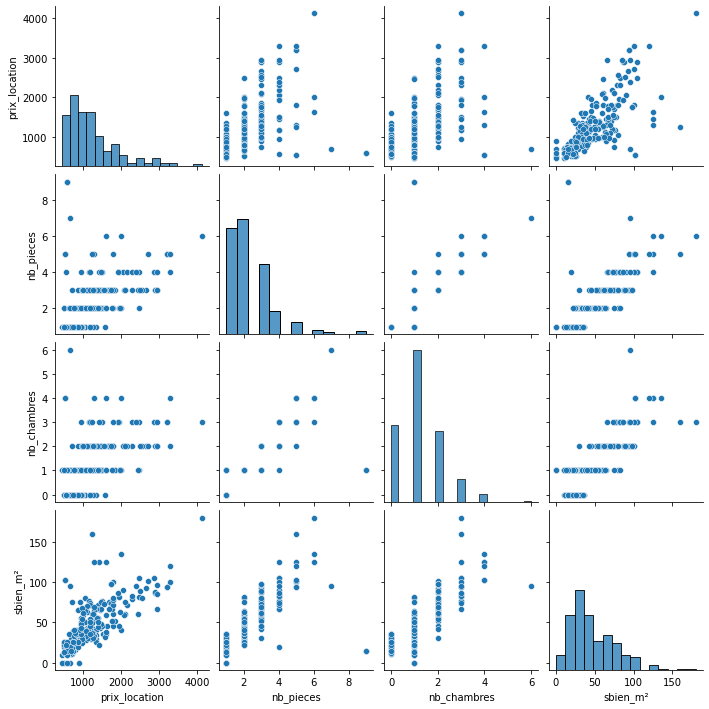

In [17]:
sns.pairplot(data[important_num_cols])

hi


<Figure size 720x576 with 0 Axes>

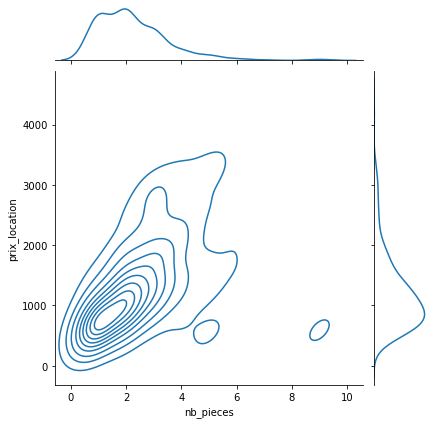

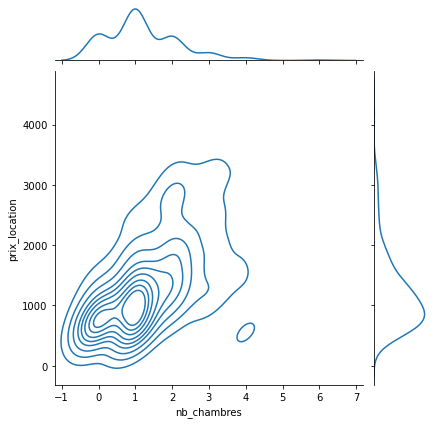

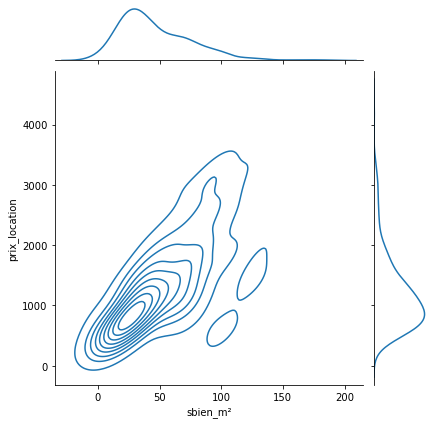

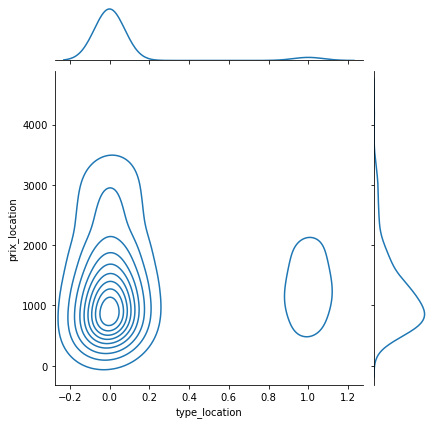

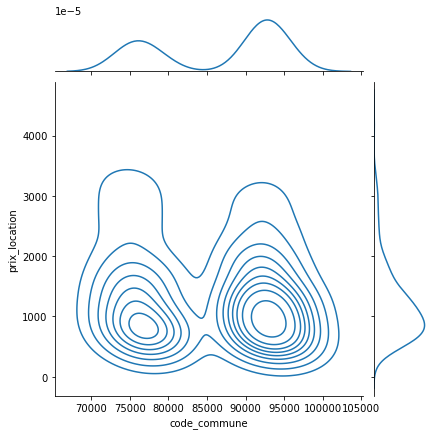

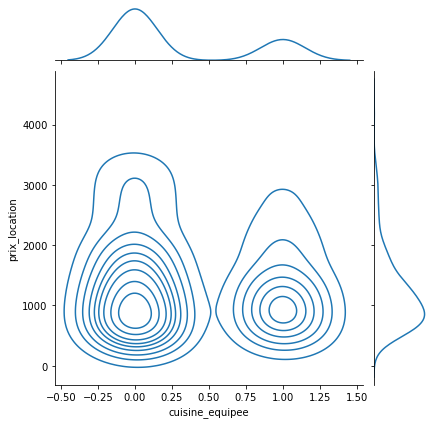

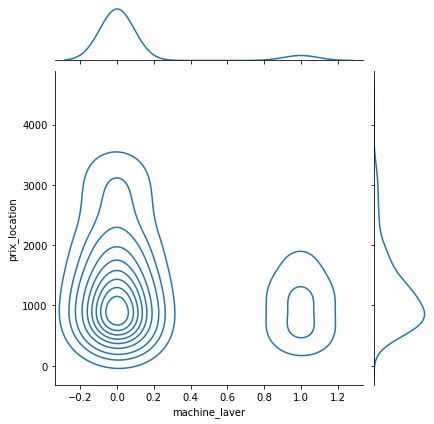

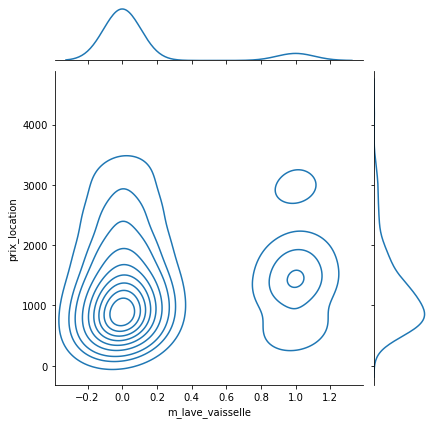

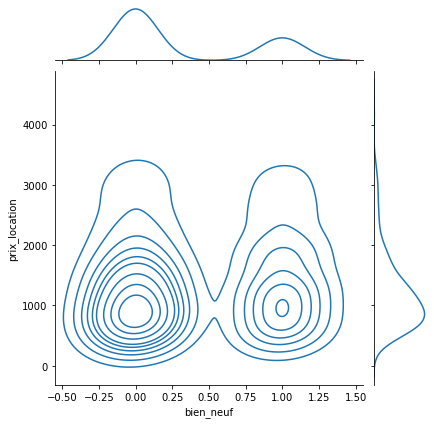

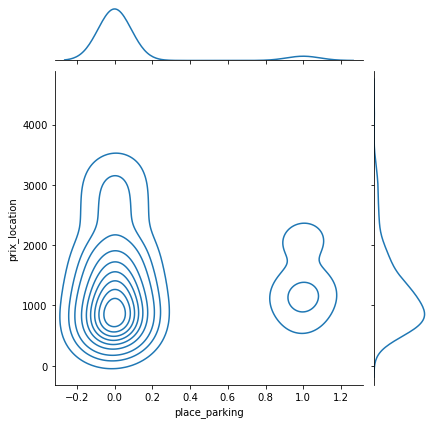

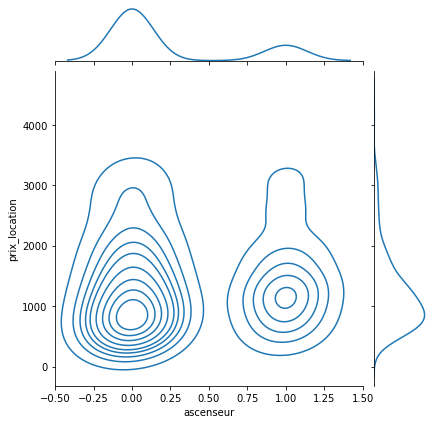

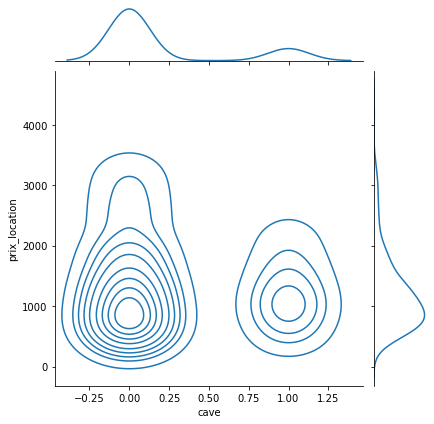

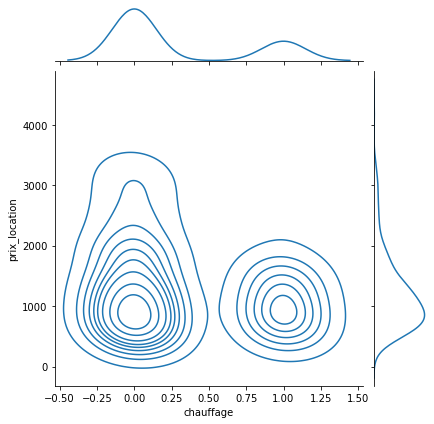

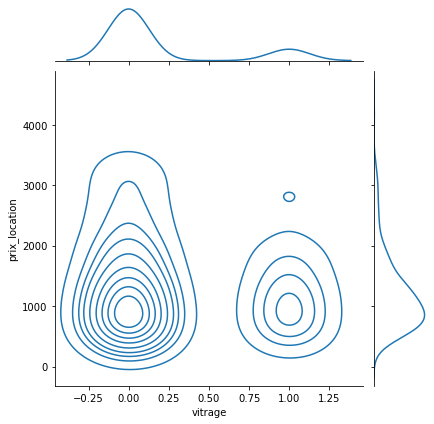

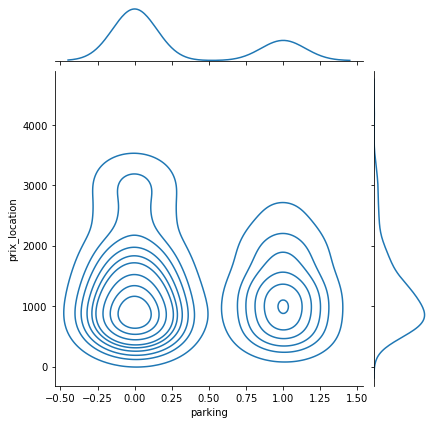

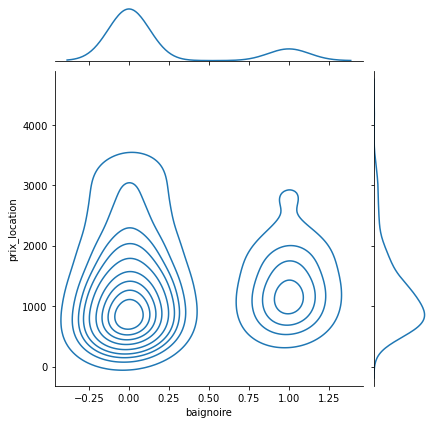

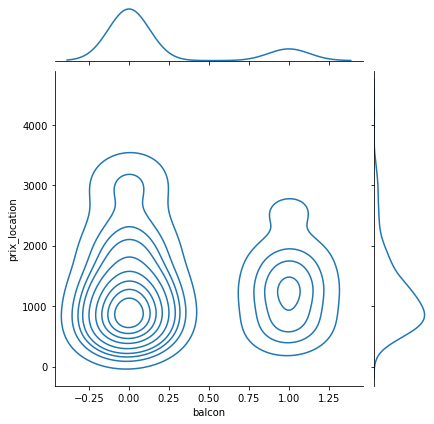

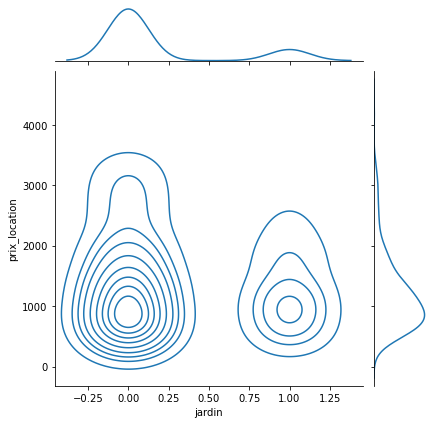

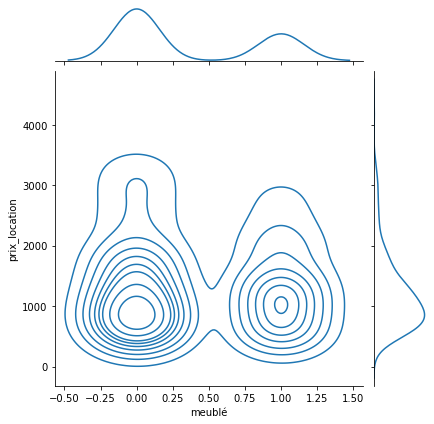

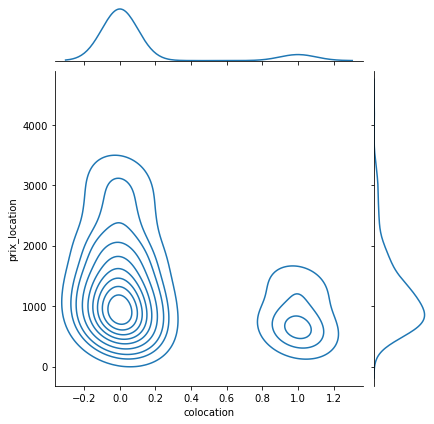

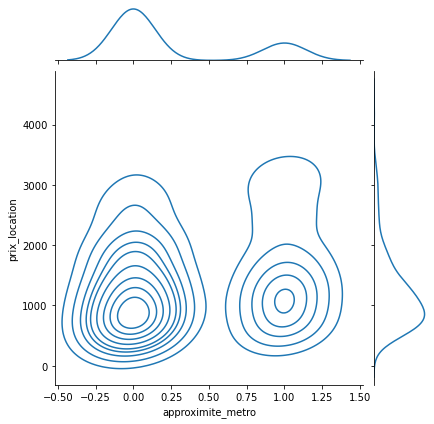

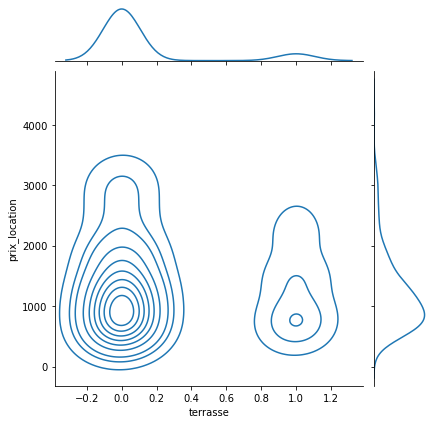

In [18]:
plt.figure(figsize=(10,8))
for i in data.columns:
    if i=="prix_location":
        print('hi')
    else:
        sns.jointplot(x=data[i], y=data["prix_location"], kind="kde")

plt.show()

In [19]:
X = df.drop("prix_location", axis=1)
y = df["prix_location"]

In [20]:
######standariser les donées

In [21]:
important_num_cols.remove("prix_location")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [22]:
X.head()

,type_location,code_departement,code_commune,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,taxe_loyer,cuisine_equipee,machine_laver,...,chauffage,vitrage,parking,baignoire,balcon,jardin,meublé,colocation,approximite_metro,terrasse
0,0,75,75056,-0.197721,-0.209619,-0.534325,0,1025,0,0,...,0,1,1,1,0,0,1,0,1,0
1,0,95,95074,-0.955144,-0.209619,-0.840964,0,500,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,93,93051,-0.197721,-0.209619,-0.295829,0,-1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,-0.197721,-0.209619,-0.602467,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,92,92026,1.317126,1.797890,1.986924,0,2880,0,0,...,0,1,0,0,0,0,1,0,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


In [25]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [26]:
## linear reg

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 284.2585025603469
MSE: 175292.26710864584
RMSE: 418.6791935463785
R2 Score: 0.7016394150991017
------------------------------
RMSE Cross-Validation: 401.78317270896343


In [28]:
#Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 285.18119233061014
MSE: 180822.5351375389
RMSE: 425.23233077641083
R2 Score: 0.6922264841639534
------------------------------
RMSE Cross-Validation: 398.8991619630084


In [29]:
#Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 292.3324948421654
MSE: 193856.0931626745
RMSE: 440.2909187828821
R2 Score: 0.6700423909357618
------------------------------
RMSE Cross-Validation: 414.224581153462


In [30]:
#Elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 364.42461119255125
MSE: 303361.18695110636
RMSE: 550.7823408126901
R2 Score: 0.4836565088244065
------------------------------
RMSE Cross-Validation: 446.3883063890147


In [31]:
#Support Vector Machines
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 553.0667497078815
MSE: 645937.8758936521
RMSE: 803.7026041351689
R2 Score: -0.09943470776052488
------------------------------
RMSE Cross-Validation: 667.2003528786099


In [32]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 244.7978
MSE: 160356.152582
RMSE: 400.44494325936995
R2 Score: 0.7270618021776761
------------------------------
RMSE Cross-Validation: 303.4414705437424


In [33]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,244.7978,160356.152582,400.444943,0.727062,303.441471
1,Ridge,285.181192,180822.535138,425.232331,0.692226,398.899162
0,LinearRegression,284.258503,175292.267109,418.679194,0.701639,401.783173
2,Lasso,292.332495,193856.093163,440.290919,0.670042,414.224581
3,ElasticNet,364.424611,303361.186951,550.782341,0.483657,446.388306
4,SVR,553.06675,645937.875894,803.702604,-0.099435,667.200353


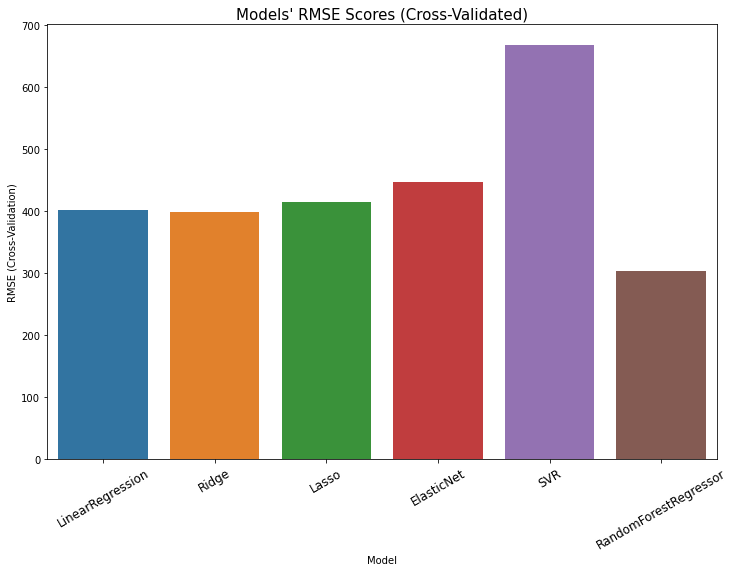

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [16]:
step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7002781020109919
MAE 0.1573427242608639
